In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import backend as K
from keras import optimizers as Kop
from keras.callbacks import ModelCheckpoint
from keras import models

import math
import os
import numpy as np
import shutil
from matplotlib import pyplot as plt
from os import listdir
from PIL import Image as PImage
import re
from sklearn.metrics import confusion_matrix
import shutil
from random import randrange, uniform

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# dimensions of our images.
img_width, img_height = 64, 64
Home_path = '/content/drive/My Drive/Colab Notebooks/MachineLearning'

train_data_dir = Home_path+'/newsplit/train'
validation_data_dir = Home_path+'/newsplit/val'
test_data_dir = Home_path+'/testset'

nb_train_samples = 7999
nb_validation_samples = 2000
epochs = 300
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
print(os.listdir(train_data_dir))


['Cats', 'Dogs']


In [0]:
print(os.listdir(test_data_dir))
#print(len(os.listdir(test_data_dir)))

['test']


In [0]:
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
step_decay(1)

0.1

## Definition of the model architecture

In [0]:
model = Sequential()

model.add(ZeroPadding2D((1,1),input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=640, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=640, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=640, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

SGD = Kop.SGD(lr=0.015, momentum=0.0, decay=0.0, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=SGD,
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)       73856     
__________

## Data augmentation functions

In [0]:
train_datagen = ImageDataGenerator(
    #rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.5,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    #fill_mode='nearest'
)
    
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    #classes = ['Dogs','Cats'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    #classes = ['Dogs','Cats'],
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")

# checkpoint
filepath = Home_path+'/Final2_VGG16_weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [checkpoint]


history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list, 
    verbose=0)

Found 16405 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.

Epoch 00001: val_acc improved from -inf to 0.50250, saving model to /content/drive/My Drive/Colab Notebooks/MachineLearning/Final2_VGG16_weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.50250

Epoch 00003: val_acc did not improve from 0.50250

Epoch 00004: val_acc improved from 0.50250 to 0.50900, saving model to /content/drive/My Drive/Colab Notebooks/MachineLearning/Final2_VGG16_weights.best.hdf5

Epoch 00005: val_acc did not improve from 0.50900

Epoch 00006: val_acc improved from 0.50900 to 0.56250, saving model to /content/drive/My Drive/Colab Notebooks/MachineLearning/Final2_VGG16_weights.best.hdf5

Epoch 00007: val_acc did not improve from 0.56250

Epoch 00008: val_acc improved from 0.56250 to 0.56500, saving model to /content/drive/My Drive/Colab Notebooks/MachineLearning/Final2_VGG16_weights.best.hdf5

Epoch 00009: val_acc did not improve from 0.56500

Epoch 00010: val_acc impro

## Test predictions

In [0]:
# Data generator
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        class_mode='categorical',
        batch_size=1,  # only data, no labels
        shuffle=False)  # keep data in same order as labels

Found 4999 images belonging to 1 classes.


In [0]:
# load weights
model.load_weights(filepath)

In [0]:
filenames = test_generator.filenames
print("filenames sample=",len(filenames))

nb_samples = len(filenames)

filenames sample= 4999


In [0]:
predict = model.predict_generator(test_generator,steps = nb_samples, verbose=1)

final_predict = np.argmax(np.asarray(predict),axis=-1)

4999/4999 [==============================] - 1650s 330ms/step


## Building the submission file

In [0]:
# Get image ID from image name
def get_fileID(s):
    return s[s.find('/')+len('/'):s.rfind('.')]#[:-4]

In [0]:
# Test
print(filenames[0])
get_fileID(filenames[0])

test/1.jpg


'1'

In [0]:
# Construct image IDs List
filesID = np.array(filenames)

for i in range(len(filenames)):
    filesID[i]=get_fileID(filenames[i])

print(filesID[0:10])

['1' '10' '100' '1000' '1001' '1002' '1003' '1004' '1005' '1006']


In [0]:
final_predict2 = np.asarray(final_predict, dtype=str)

for i in range(len(final_predict2)):
  if final_predict2[i]=='0':
    final_predict2[i] = 'Cat'
  else:
    final_predict2[i] = 'Dog'

  
predictions = np.dstack((filesID,final_predict2))[0]

predictions2 = predictions[predictions[:,0].astype(int).argsort()]
print(predictions2)

[['1' 'Cat']
 ['2' 'Dog']
 ['3' 'Cat']
 ...
 ['4997' 'Dog']
 ['4998' 'Dog']
 ['4999' 'Dog']]


In [0]:
np.savetxt(Home_path+'/submission.csv', np.asarray(predictions2), delimiter=",",fmt='%s', header='id,label')

## Learning curves

In [0]:
def visualize_training_history(history):
  # Training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

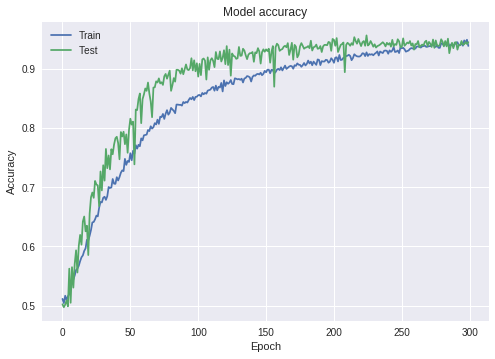

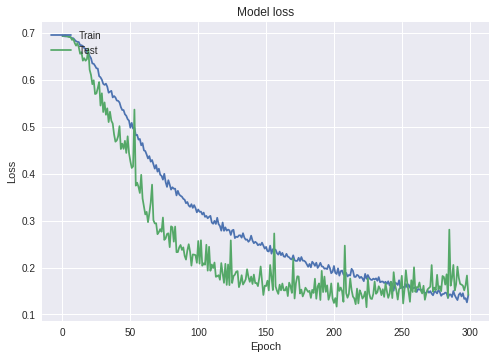

In [0]:
visualize_training_history(history)

## Model performance on validation set

In [0]:
# Data generator
val_datagen2 = ImageDataGenerator(rescale=1. / 255)
val_generator2 = val_datagen2.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        class_mode='categorical',
        batch_size=1,  # only data, no labels
        shuffle=False)

Found 4000 images belonging to 2 classes.


In [0]:
val_prediction = model.predict_generator(val_generator2,steps = 4000, verbose=1)

y_pred = np.argmax(val_prediction,axis=-1)

y_true = np.dstack((val_generator2.filenames,val_generator2.classes))[0]

labels = val_generator2.class_indices
print(labels)

4000/4000 [==============================] - 56s 14ms/step
{'Cats': 0, 'Dogs': 1}


In [0]:
confusion_matrix(y_true[:,1].astype(int), y_pred)

array([[1938,   62],
       [ 132, 1868]])

In [0]:
# identify misclassified images
misclassification100 = [] # misclassified with high confidence
misclassification50 = []  # misclassified with low confidence

for i in range(len(y_pred)):  
    if y_pred[i].astype(int)!=y_true[i,1].astype(int):
        if y_true[i,1].astype(int)==0: true_label='Cat'
        if y_true[i,1].astype(int)==1: true_label='Dog'
    
        if y_pred[i].astype(int)==0: prediction='Cat'
        if y_pred[i].astype(int)==1: prediction='Dog'
            
        if max(val_prediction[i])>=0.6:
            misclassification100.append((y_true[i,0],true_label,prediction))
        else:
            misclassification50.append((y_true[i,0],true_label,prediction))

print('Number of misclassified images with high confidence = ',len(misclassification100))
print('Number of misclassified images with low confidence = ',len(misclassification50))

Number of misclassified images with high confidence =  161
Number of misclassified images with low confidence =  33


## Ploting misclassified images

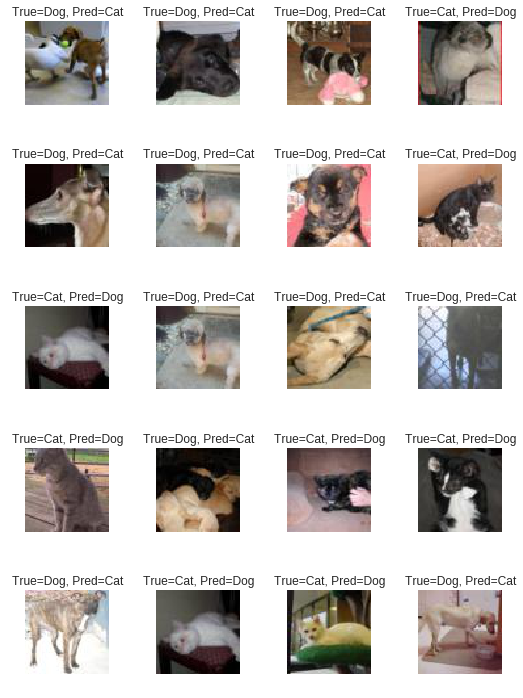

In [0]:
#Misclassified with high confidence
w=64
h=64
fig=plt.figure(figsize=(9, 12))
#fig.update(wspace=0.5, hspace=0.5)

columns = 4
rows = 5
for i in range(1, columns*rows +1):
    j = randrange(0, len(misclassification100))
    img = image.load_img(validation_data_dir+'/'+misclassification100[j][0])
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title('True='+misclassification100[j][1]+', Pred='+str(misclassification100[j][2]))
    ax.grid(False)
    ax.axis('off')
    plt.imshow(img)
plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

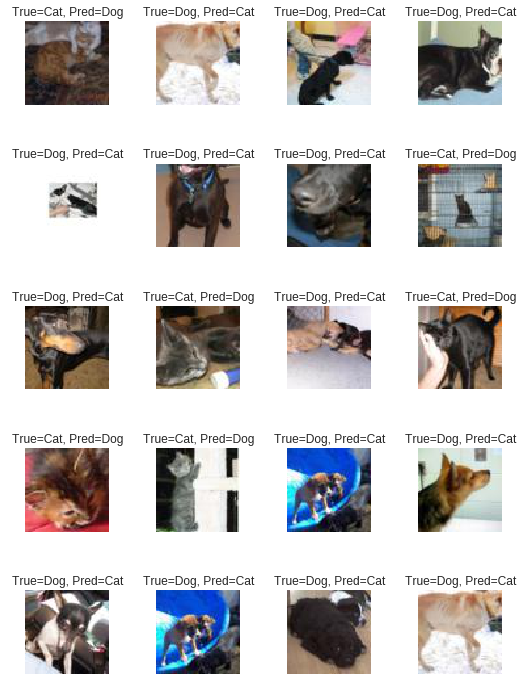

In [0]:
#Misclassified with low confidence
w=64
h=64
fig=plt.figure(figsize=(9, 12))
#fig.update(wspace=0.5, hspace=0.5)

columns = 4
rows = 5
for i in range(1, columns*rows +1):
    j = randrange(0, len(misclassification50))
    img = image.load_img(validation_data_dir+'/'+misclassification50[j][0])
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title('True='+misclassification50[j][1]+', Pred='+str(misclassification50[j][2]))
    ax.grid(False)
    ax.axis('off')
    plt.imshow(img)
plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

## Displaying feature map

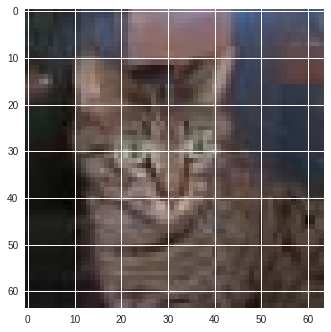

(1, 64, 64, 3)


In [0]:
#img_path = 'test_set/triangles/drawing(2).png'
from matplotlib import pyplot as plt
img = image.load_img(train_data_dir+'/Cats/1.Cat.jpg', target_size=(64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [0]:
 # Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in model.layers[:12]]

 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 66, 66, 3)


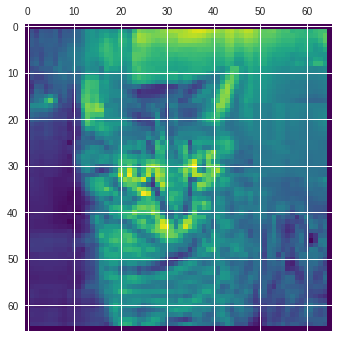

In [0]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  self.axes.set_ylim((ymin, ymax), auto=None)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/usr/local/lib/python3.6/dist-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


RuntimeError: ignored

<Figure size 1152x0 with 1 Axes>

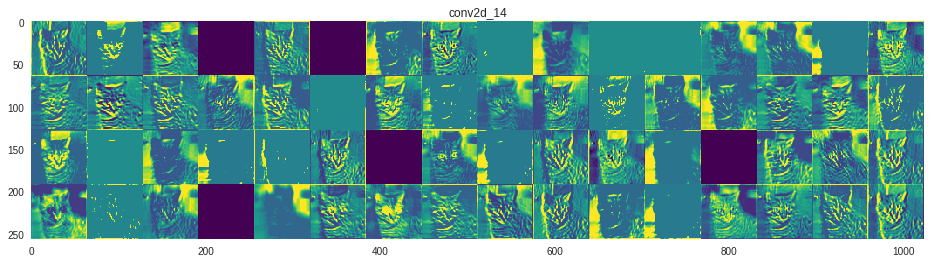

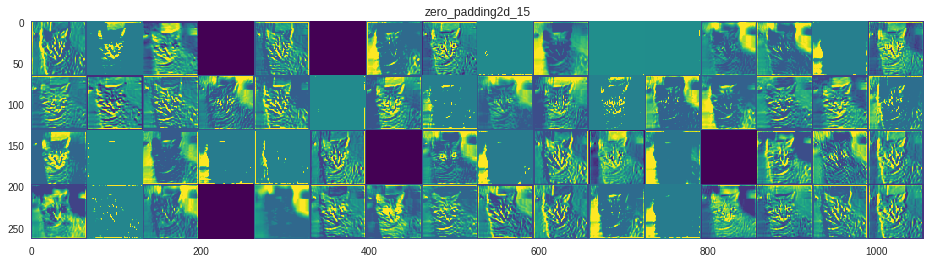

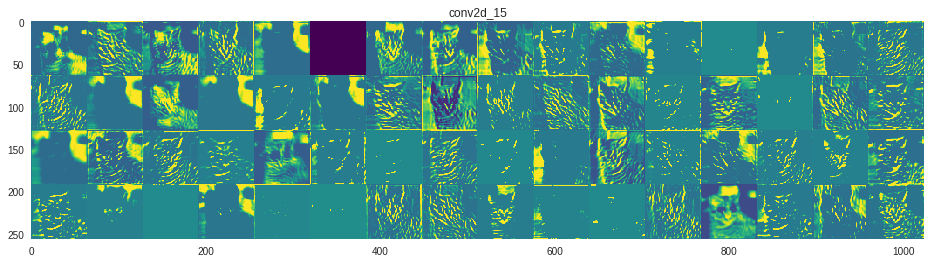

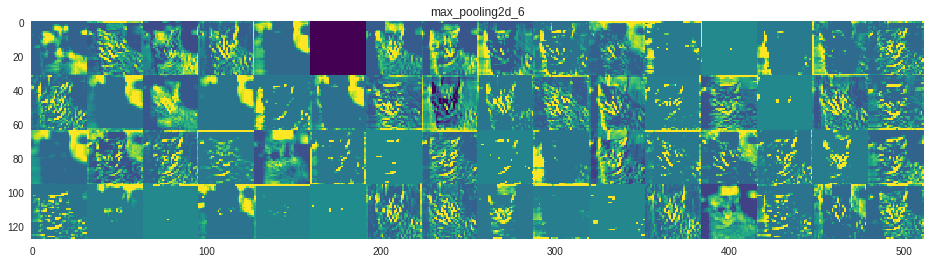

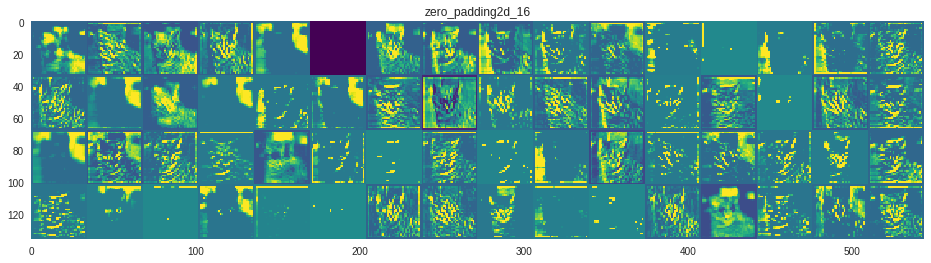

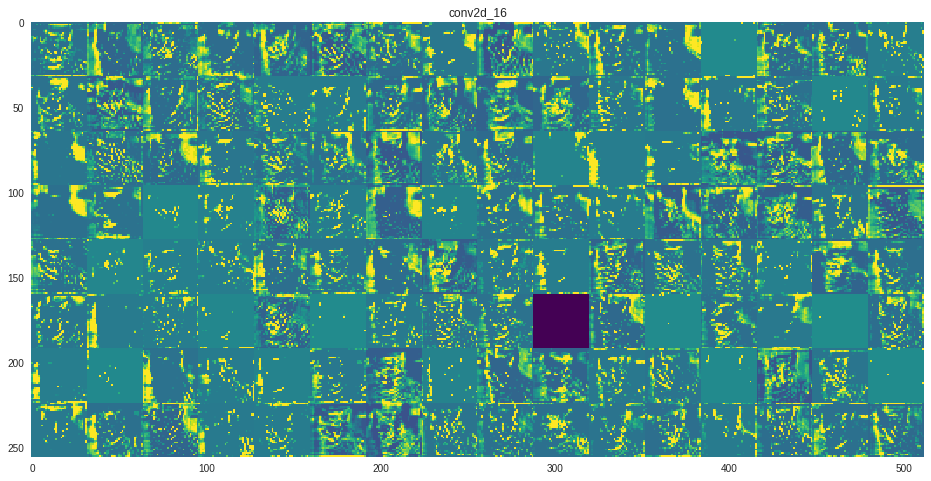

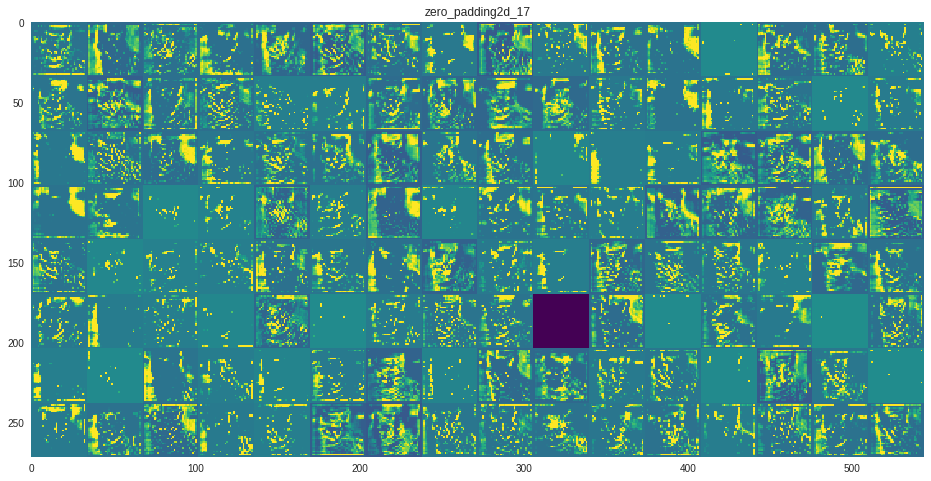

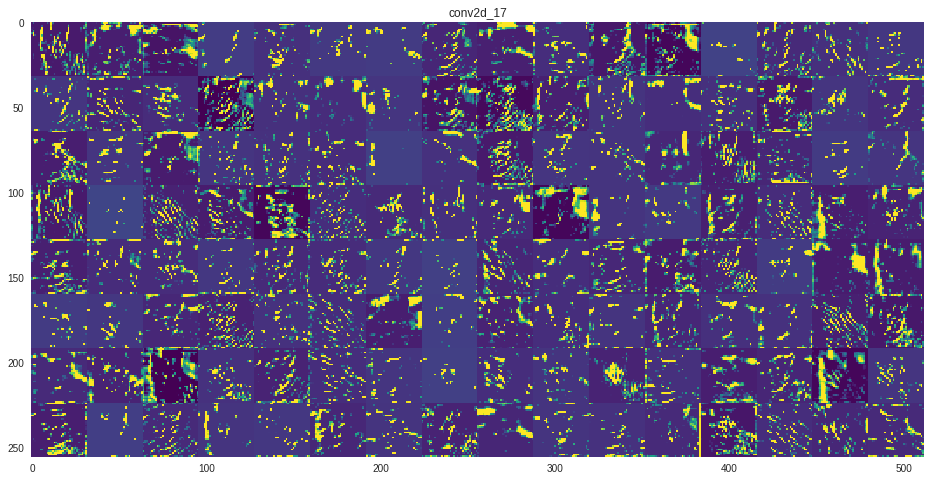

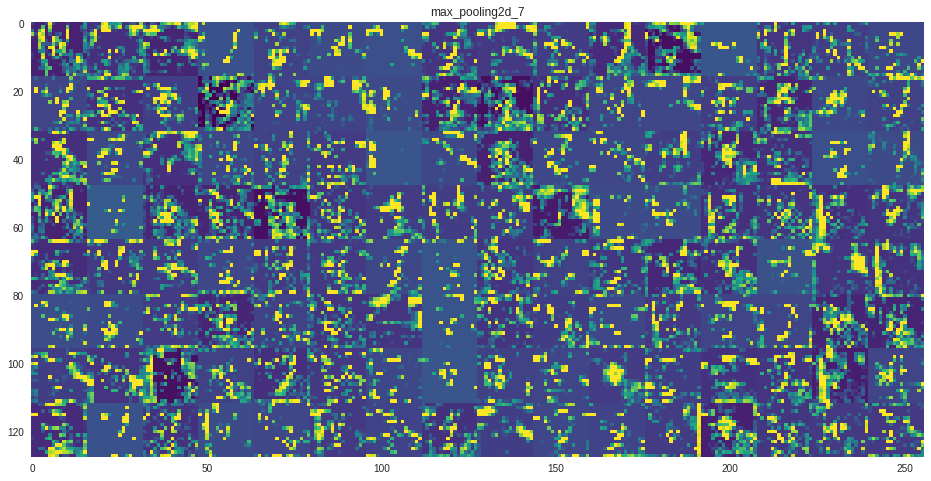

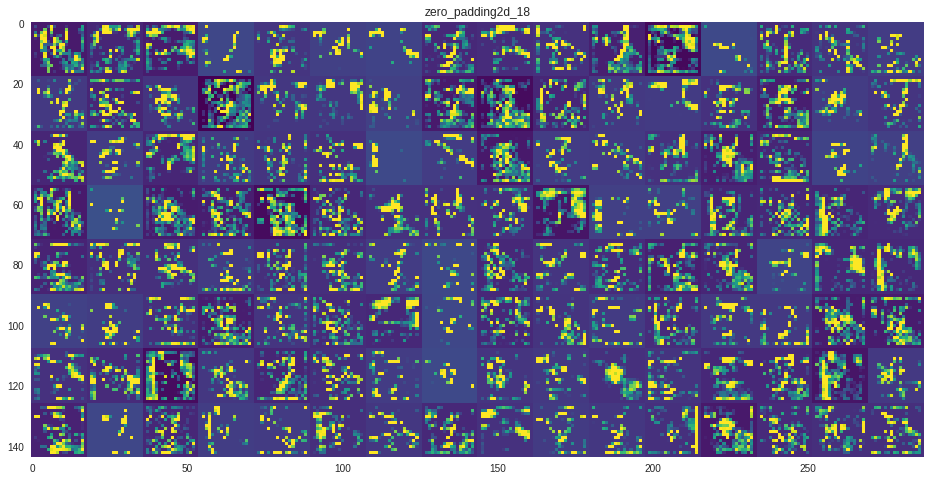

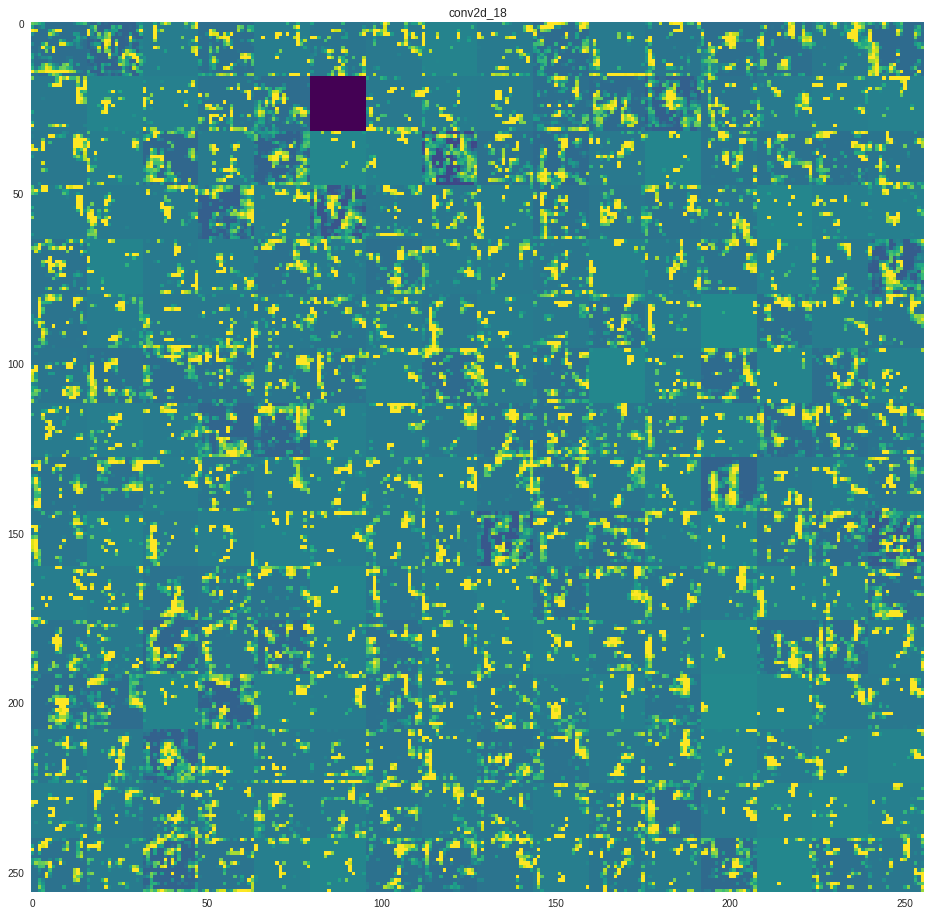

In [0]:
%matplotlib inline

layer_names = []
for layer in model.layers[:20]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')